## Mapping poverty and inequality in Ghana

This Jupyter Notebook compiles various indicators of socioeconomic wellbeing across districts in Ghana. Data are from the Ghana Statistical Service (GSS)'s [2015 Poverty Map](http://www2.statsghana.gov.gh/docfiles/publications/POVERTY%20MAP%20FOR%20GHANA-05102015.pdf). The poverty indicators in the report were computed based on data from the 2010 Population and Housing Census (2010 PHC) and the 2012/2013 Ghana Living Standards Survey (GLSS6). The report presents the poverty headcount, depth and inequality for all the 216 districts and 29 sub-districts in the country. The maps in this repository focus on the 216 districts.

In [23]:
import pandas as pd
import numpy as np
import scipy.stats
import requests
%pylab inline
import seaborn as sns
import mplleaflet as mpll
import geopandas as gpd
import osmnx as ox
from IPython.display import Image
from IPython import display
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt2
from shapely.geometry import Point
import pylab as plt

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [25]:
gh_districts = gpd.read_file('shapefiles/Map_of_Districts_216.shp') # source: https://data.gov.gh/dataset/shapefiles-all-districts-ghana-2012-216-districts

In [26]:
df = pd.read_csv('Ghana district poverty 2015.csv')

In [27]:
pop = df.groupby('District').mean()[['Population']]
poor_num = df.groupby('District').mean()[['Estimated number of poor persons']]
poverty = df.groupby('District').mean()[['Poverty head count (P0)']]
gini = df.groupby('District').mean()[['Gini coefficient']]
pov_depth = df.groupby('District').mean()[['Poverty depth (P1)']]
pov_sev = df.groupby('District').mean()[['Poverty severity (P2)']]

In [28]:
# Create a new geodataframe comprising 10 merged polygons
districts = gh_districts.dissolve(by = 'LABEL')
districts.shape

(216, 10)

In [29]:
pov_depth = pd.merge(districts, pov_depth, left_index=True, right_index=True)
pov_depth = gpd.GeoDataFrame(pov_depth)

pov_sev = pd.merge(districts, pov_sev, left_index=True, right_index=True)
pov_sev = gpd.GeoDataFrame(pov_sev)

poor_num = pd.merge(districts, poor_num, left_index=True, right_index=True)
poor_num = gpd.GeoDataFrame(poor_num)

poverty = pd.merge(districts, poverty, left_index=True, right_index=True)
poverty = gpd.GeoDataFrame(poverty)

gini = pd.merge(districts, gini, left_index=True, right_index=True)
gini = gpd.GeoDataFrame(gini)

### Poverty rates

Mapping the incidence of poverty in the country shows that there is a high concentration of poverty in the North Western part of Ghana. Though incidence in the districts of the South Western parts is very low, there are however few districts with relatively high incidence.

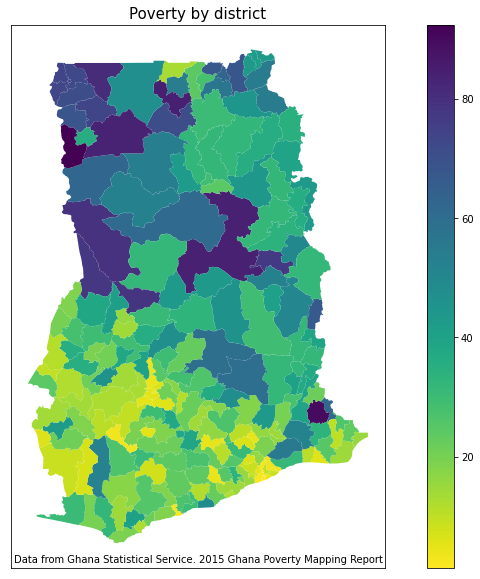

In [58]:
# other heatmap colors = 
poverty.plot(column = 'Poverty head count (P0)', legend = True, figsize = [15,10], cmap="viridis_r")
plt.title('Poverty by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Estimated number of poor persons
 
The concentration of poor persons is mainly observed in the northern part of Ghana. Among the districts in Ghana, [East Gonja](https://en.wikipedia.org/wiki/East_Gonja_Municipal_District) in the Northern Region stands out as the district with most of the poor persons. Districts in the Southern Ghana on the other hand show very low concentration of poor persons, there are few districts with high number of poor persons, but these numbers cannot be compared to what pertains to districts in the northern part of Ghana.

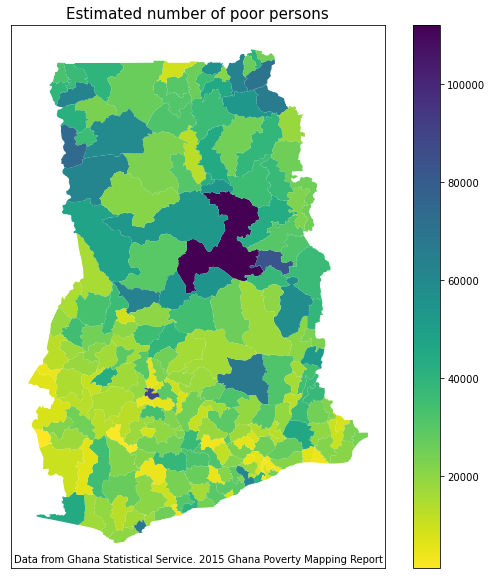

In [59]:
poor_num.plot(column = 'Estimated number of poor persons', legend = True, figsize = [10,10], cmap="viridis_r")
plt.title('Estimated number of poor persons', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Poverty depth (P1)

Depth of poverty (P1), also known as the poverty gap, is a measure of how far the poor are from the poverty line.

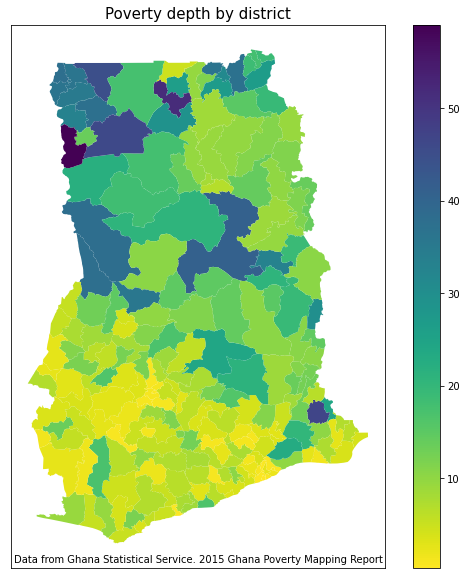

In [60]:
pov_depth.plot(column = 'Poverty depth (P1)', legend = True, figsize = [10,10], cmap="viridis_r")
plt.title('Poverty depth by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Poverty severity (P2)

Severity of poverty (P2) is the square of the poverty gap, which gives greater attention to the needs of the poorest. It takes account of the distribution of poverty among the poor, giving greater weight to the poorest of the poor. 

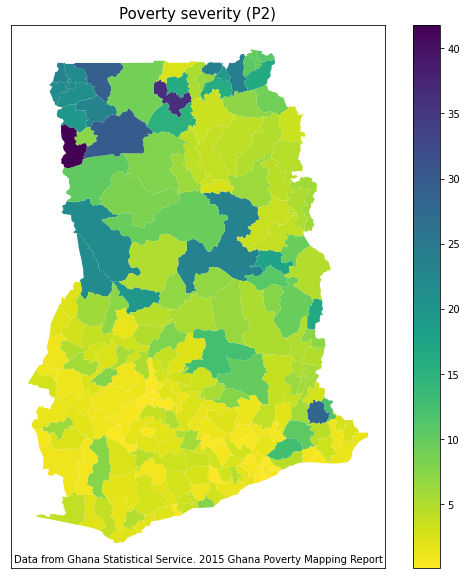

In [61]:
pov_sev.plot(column = 'Poverty severity (P2)', legend = True, figsize = [10,10], cmap="viridis_r")
plt.title('Poverty severity (P2)', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Gini coefficient

The Gini coefficient, a measure of welfare distribution, is used to measure inequality.

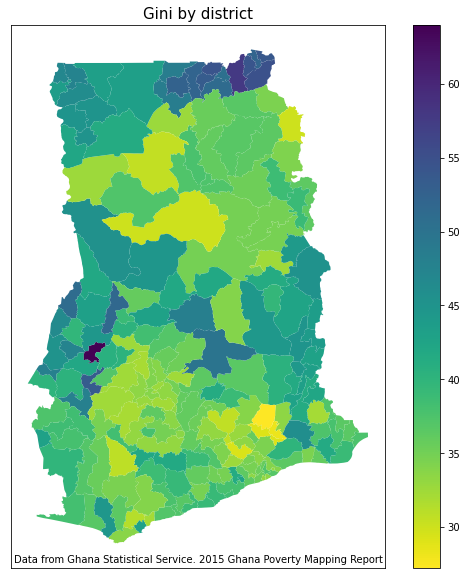

In [62]:
gini.plot(column = 'Gini coefficient', legend = True, figsize = [10,10], cmap="viridis_r")
plt.title('Gini by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

In [ ]:
jupyter nbconvert povertymapping.ipynb --TemplateExporter.exclude_input=True